In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [176]:
output = pd.read_csv('../output/array_size.csv', header=None)

In [177]:
sizes = output[0]

N_STEPS = 16 * 1024 * 1024

timings = output[1]/N_STEPS

In [178]:
# timings = output.iloc[:,1:].transpose()
# print(timings.head())
# for i in timings:
#     timing = timings[i]
#     mean = timing.mean()
#     timing[np.abs(timing-mean) > (3*timing.std())] = mean
    
# timings = timings.transpose()


In [179]:
units = [
    {
        'size': pow(2, 30),
        'unit': "GB"
    },
    {
        'size': pow(2, 20),
        'unit': "MB"
    },
    {
        'size': pow(2, 10),
        'unit': "kB"
    },
]

def get_unit(size):
    for unit in units:
        if size > unit['size']:
            return f"{size / unit.get('size')} {unit['unit']}"
    return f'{size} B'

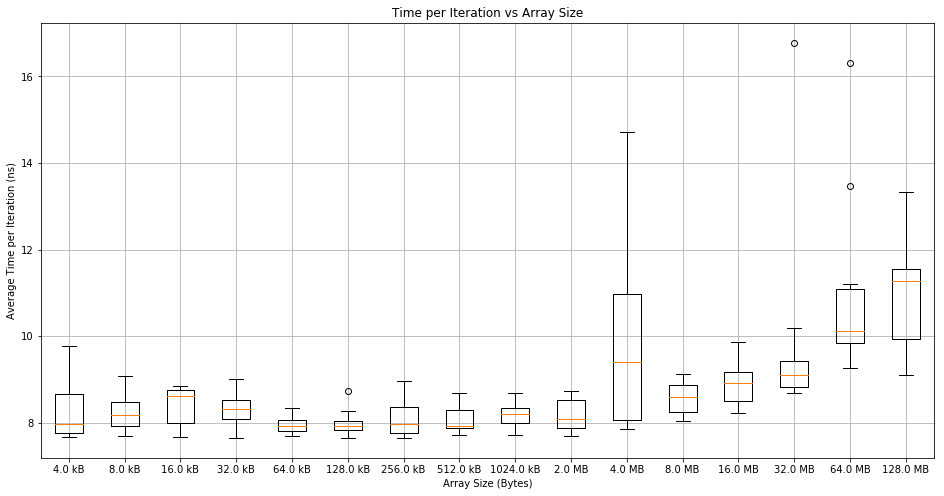

In [180]:
x = range(1, len(sizes) + 1)
# plt.plot(x, timings)
# plt.scatter(x=x, y=timings)

plt.boxplot(output.iloc[:,1:] / N_STEPS)


sizes_with_units = [get_unit(size) for size in sizes]
plt.grid(True)
plt.xticks(x, sizes_with_units)
plt.title('Time per Iteration vs Array Size')
plt.xlabel('Array Size (Bytes)')
plt.ylabel('Average Time per Iteration (ns)')
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()